# Árboles de Decisión - Dataset de Depresión
Basado en el estilo de `Arboles_IA_Ejemplo1 2025.ipynb`

In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.model_selection
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

In [22]:
# Cargar el archivo de datos
df = pd.read_csv('depression.csv')
df.head()

Gender   Age  CGPA     Sleep Duration         Degree Suicidal Thoughts  \
0    Male  33.0  8.97          5-6 hours  Undergraduate               Yes   
1  Female  24.0  5.90          5-6 hours  Undergraduate                No   
2    Male  31.0  7.03  Less than 5 hours  Undergraduate                No   
3  Female  28.0  5.59          7-8 hours  Undergraduate               Yes   
4  Female  25.0  8.13          5-6 hours   Postgraduate               Yes   

   Work/Study Hours Family History of Mental Illness  Depression  
0               3.0                               No           1  
1               3.0                              Yes           0  
2               9.0                              Yes           0  
3               4.0                              Yes           1  
4               1.0                               No           0

In [23]:
from sklearn.model_selection import train_test_split
N = len(df)
cTrain = int(N * 0.8)
cTest = N - cTrain
print(f"Total: {N}, Entrenamiento: {cTrain}, Prueba: {cTest}")

train_data, test_data = sklearn.model_selection.train_test_split(
    df, train_size=cTrain, random_state=123)

X_train = train_data.drop('Depression', axis=1)
y_train = train_data['Depression']
X_test = test_data.drop('Depression', axis=1)
y_test = test_data['Depression']

Total: 27901, Entrenamiento: 22320, Prueba: 5581


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22320 entries, 27346 to 19966
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            22320 non-null  object 
 1   Age                               22320 non-null  float64
 2   CGPA                              22320 non-null  float64
 3   Sleep Duration                    22320 non-null  object 
 4   Degree                            22320 non-null  object 
 5   Suicidal Thoughts                 22320 non-null  object 
 6   Work/Study Hours                  22320 non-null  float64
 7   Family History of Mental Illness  22320 non-null  object 
 8   Depression                        22320 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB


In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = ['Age', 'CGPA', 'Work/Study Hours']
cat_features = ['Gender', 'Sleep Duration', 'Degree', 'Suicidal Thoughts', 'Family History of Mental Illness']

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore'), cat_features)
])

X_train_raw = train_data.drop('Depression', axis=1)
y_train = train_data['Depression']
X_test_raw = test_data.drop('Depression', axis=1)
y_test = test_data['Depression']

X_train = full_pipeline.fit_transform(X_train_raw)
X_test = full_pipeline.transform(X_test_raw)

## Árboles con Criterion = 'gini'

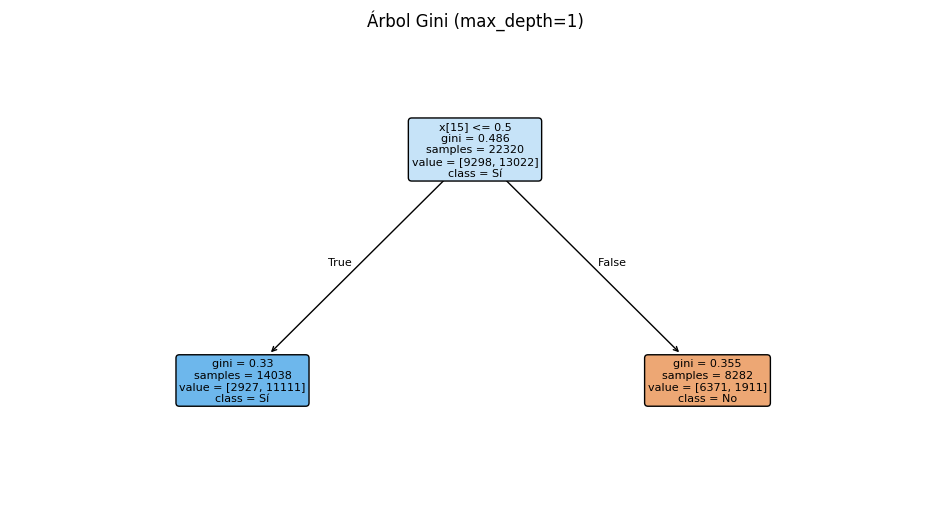

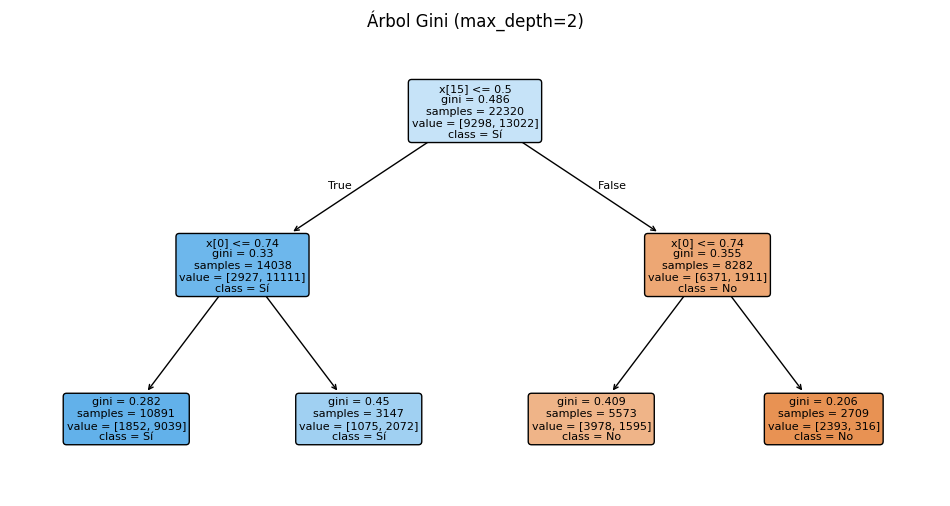

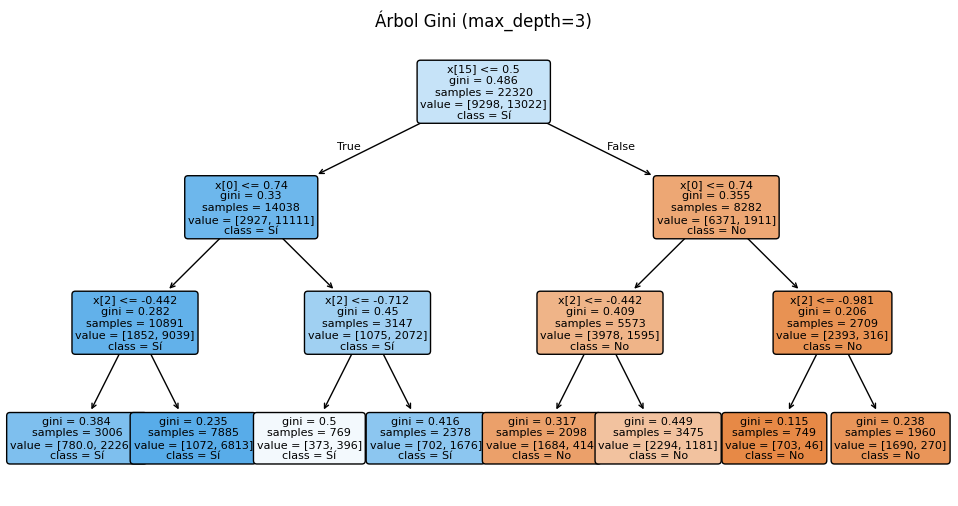

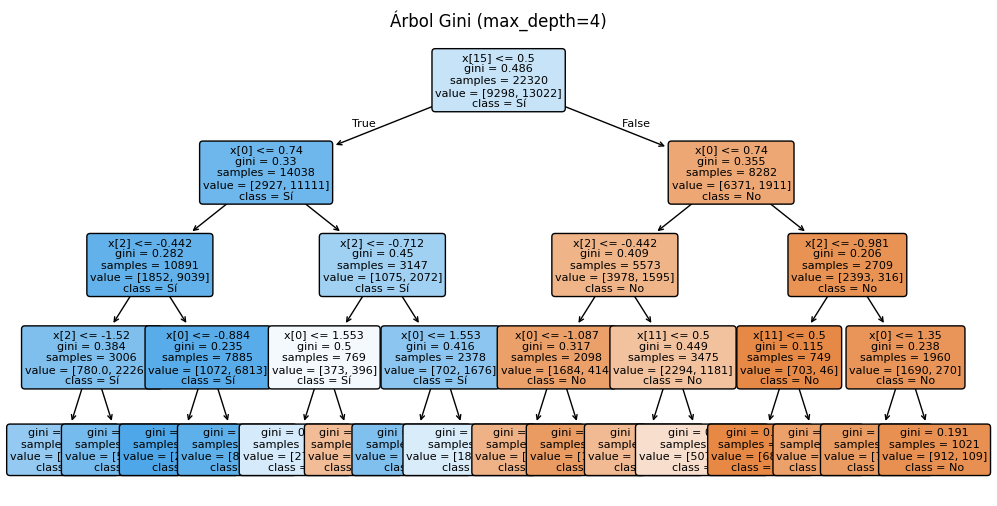

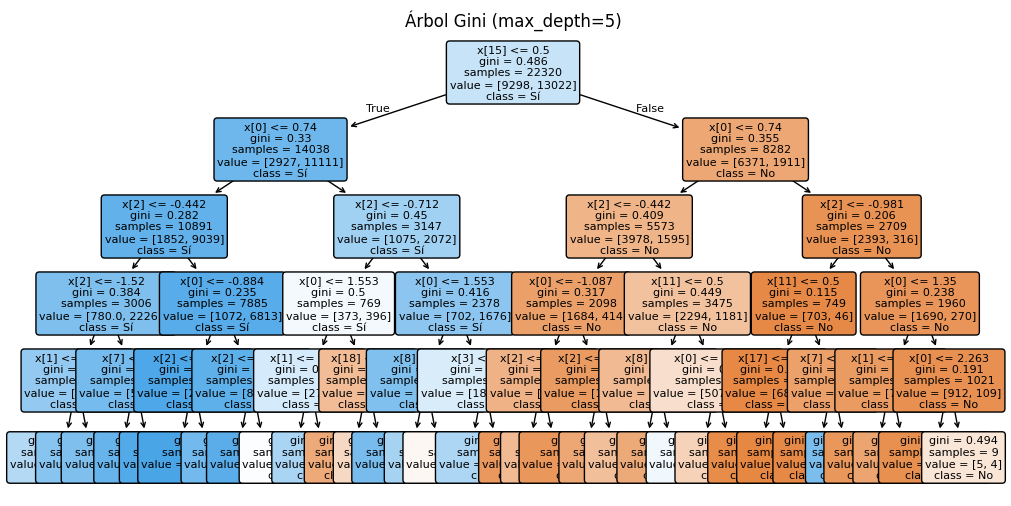

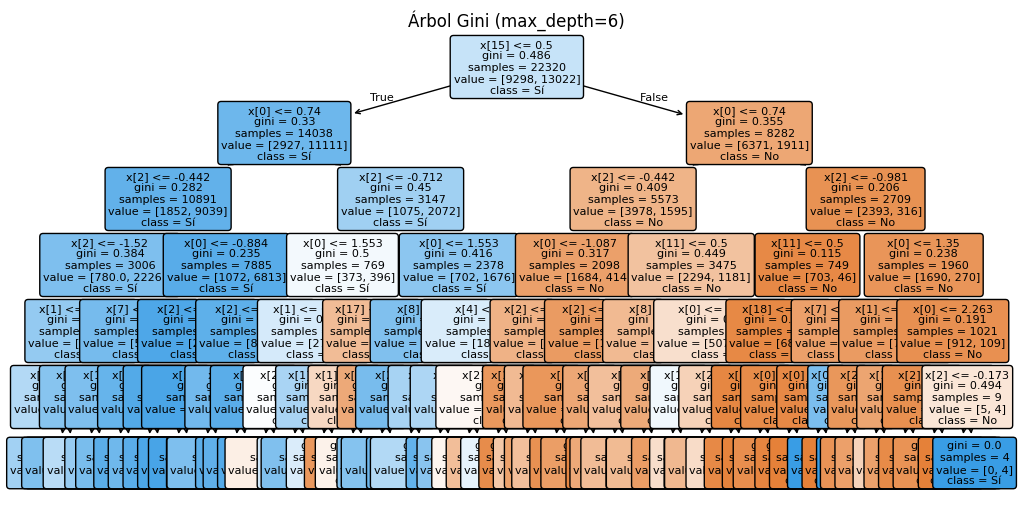

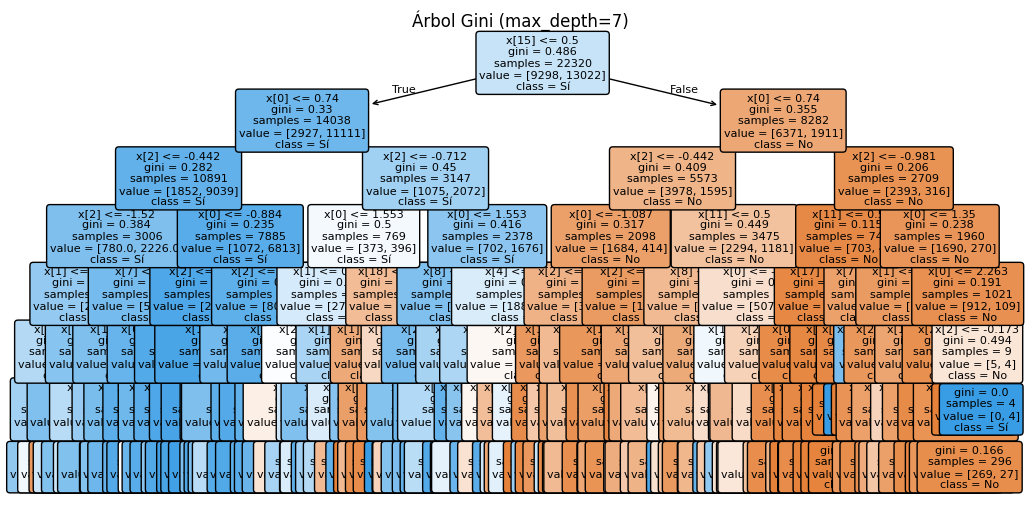

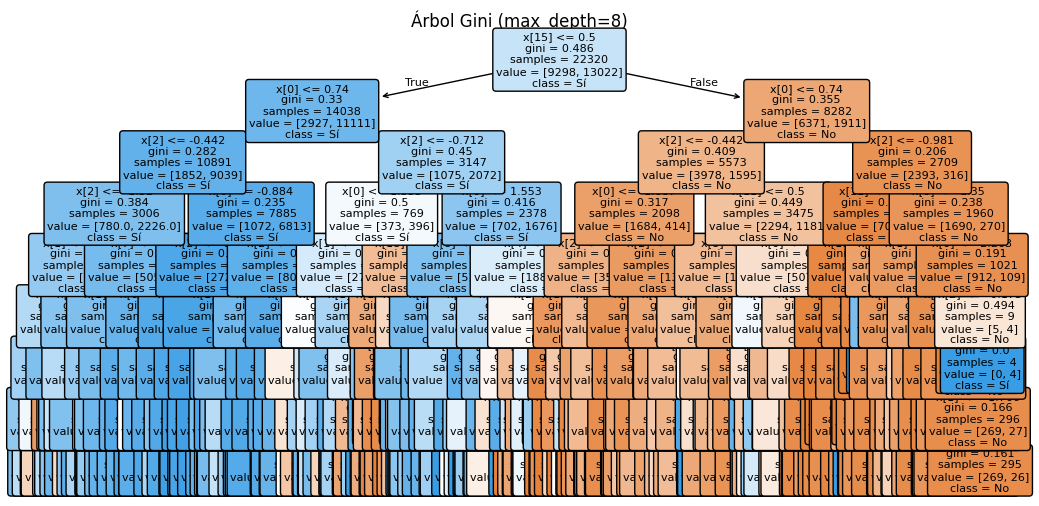

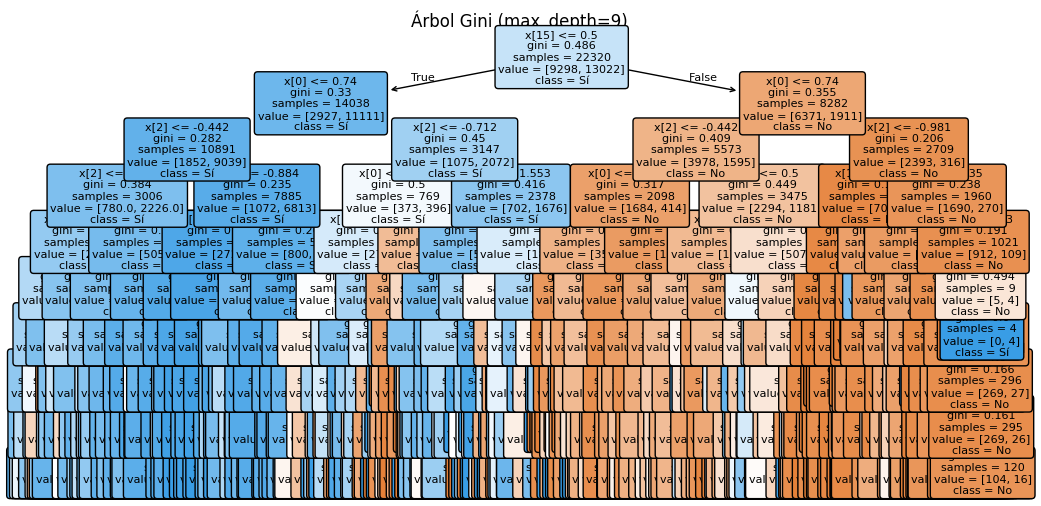

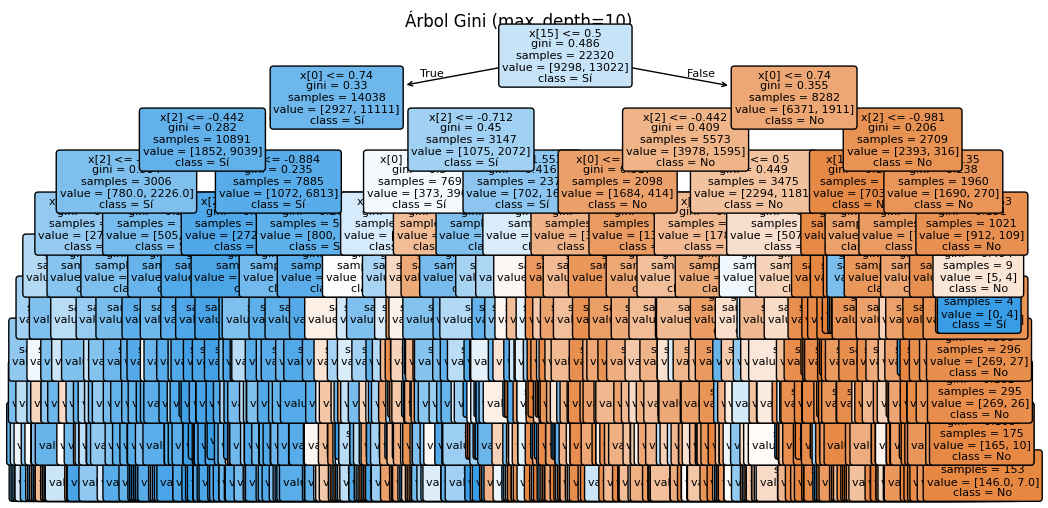

max_depth  accuracy
0          1  0.777818
1          2  0.777818
2          3  0.777818
3          4  0.781401
4          5  0.779609
5          6  0.782297
6          7  0.779072
7          8  0.778713
8          9  0.776743
9         10  0.768500

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

resultados_gini = []

for d in range(1, 11):
    modelo1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=123)
    modelo1.fit(X_train, y_train)
    pred = modelo1.predict(X_test)
    acc = accuracy_score(y_test, pred)
    resultados_gini.append({'max_depth': d, 'accuracy': acc})

    plt.figure(figsize=(12, 6))
    plot_tree(modelo1, filled=True, class_names=['No', 'Sí'], rounded=True, fontsize=8)
    plt.title(f"Árbol Gini (max_depth={d})")
    plt.show()

pd.DataFrame(resultados_gini)


## Árboles con Criterion = 'entropy'

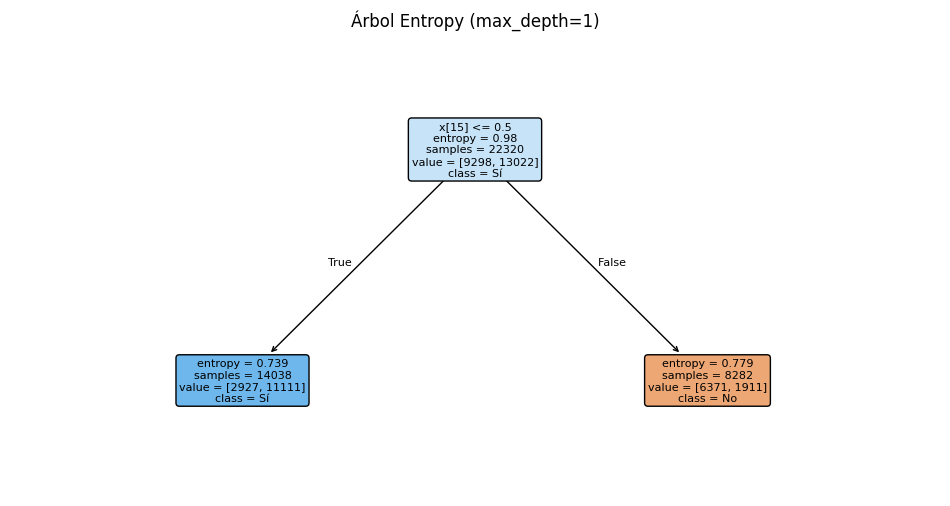

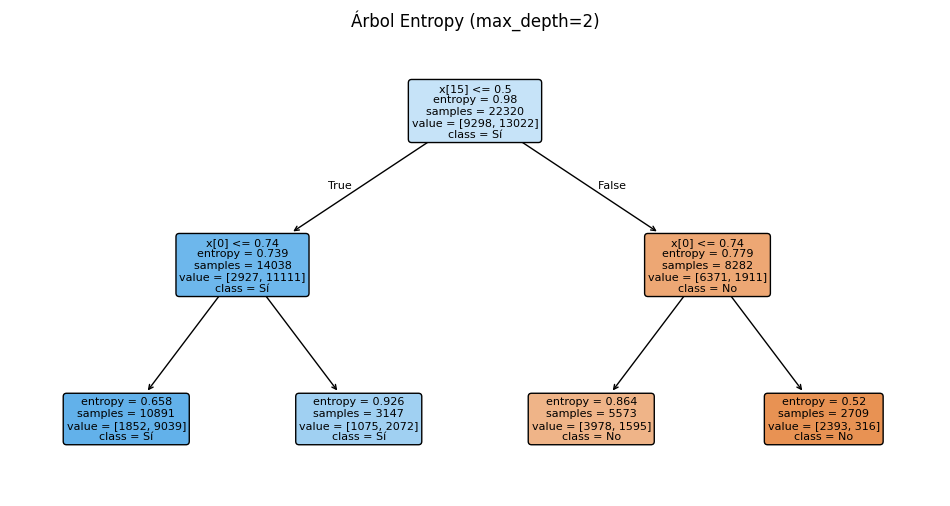

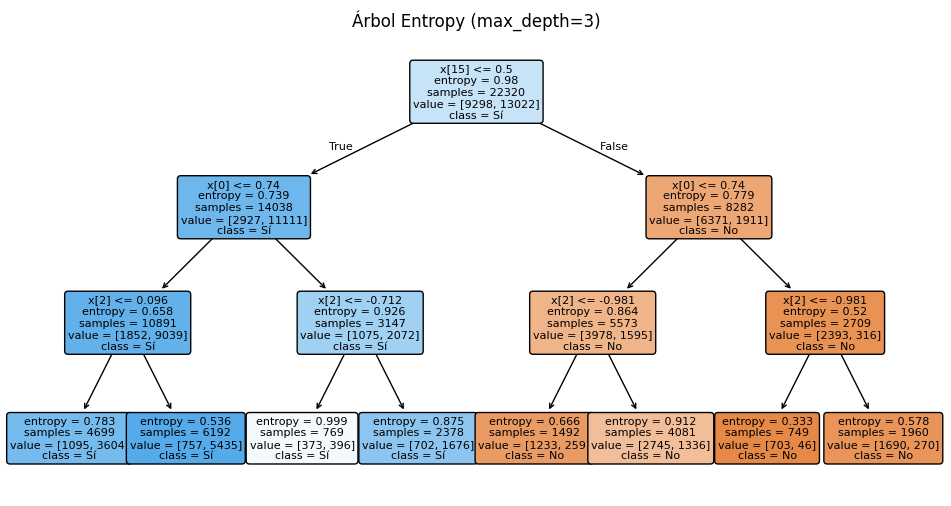

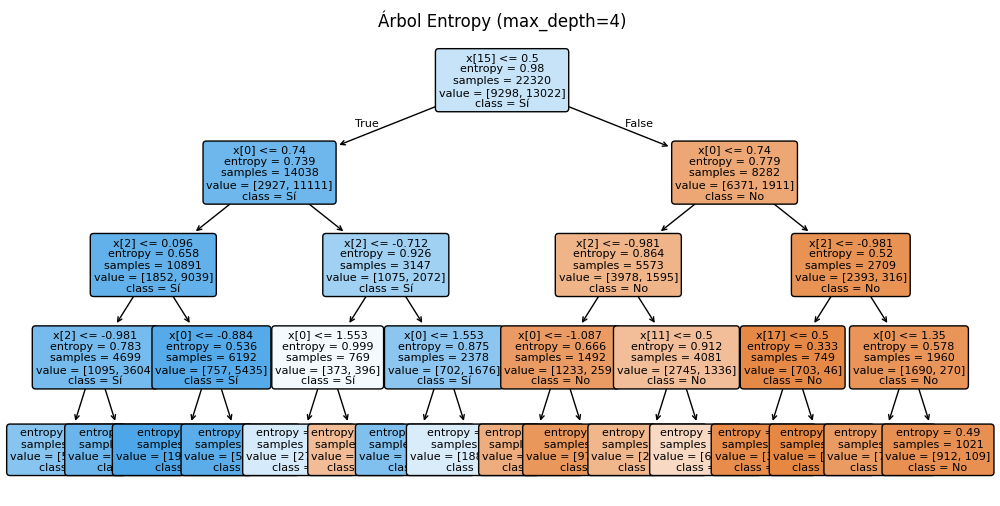

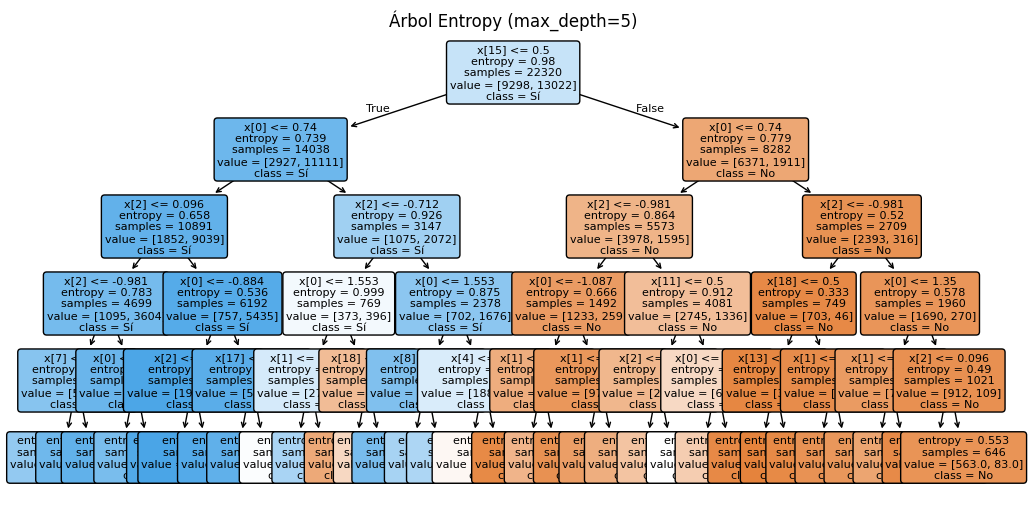

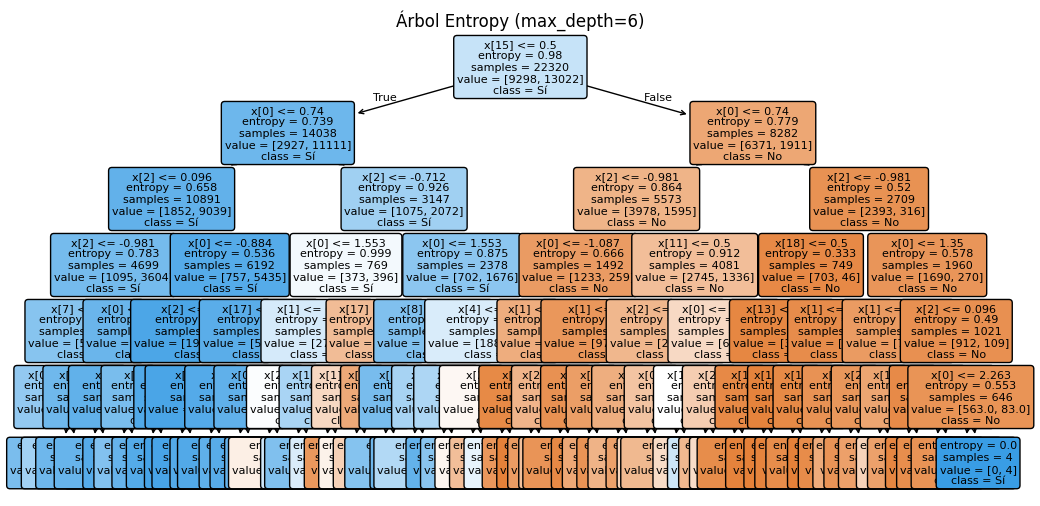

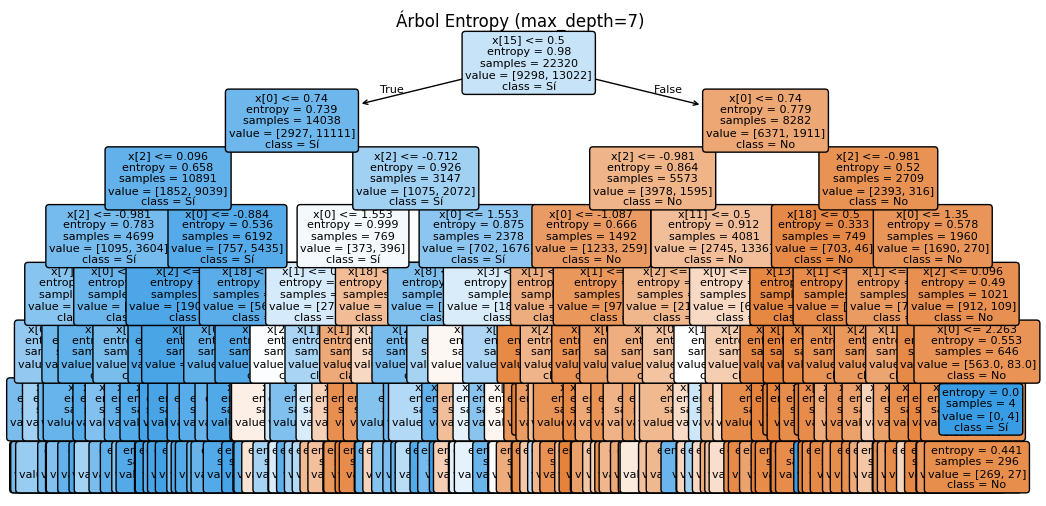

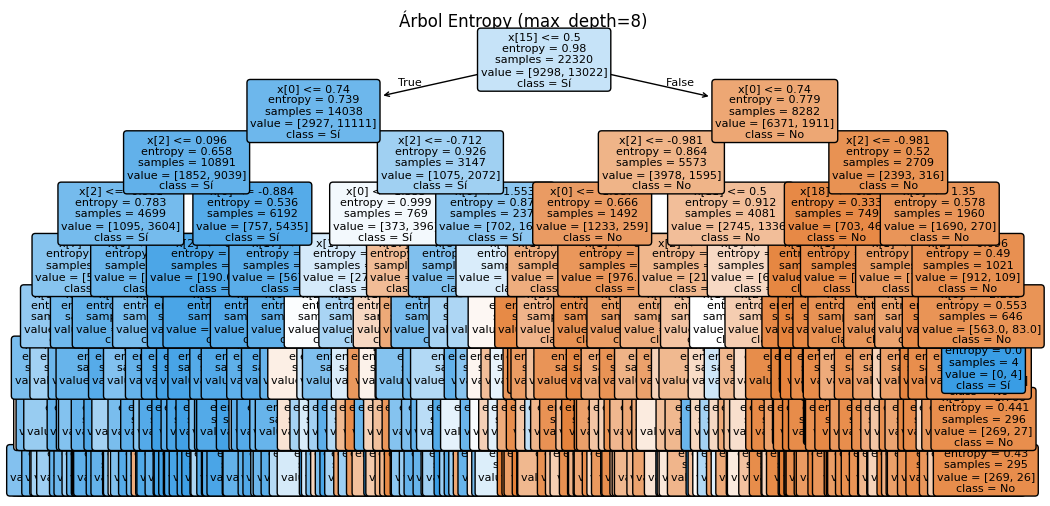

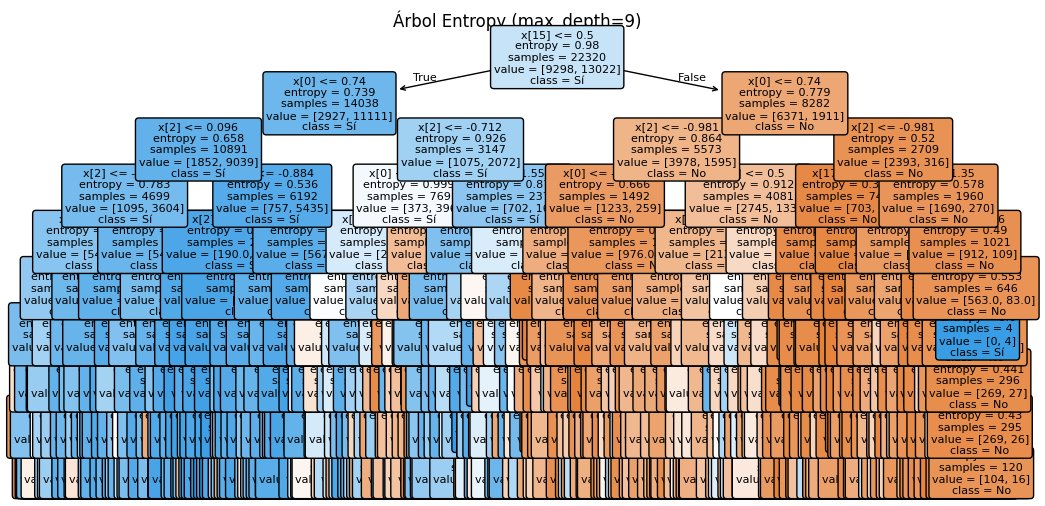

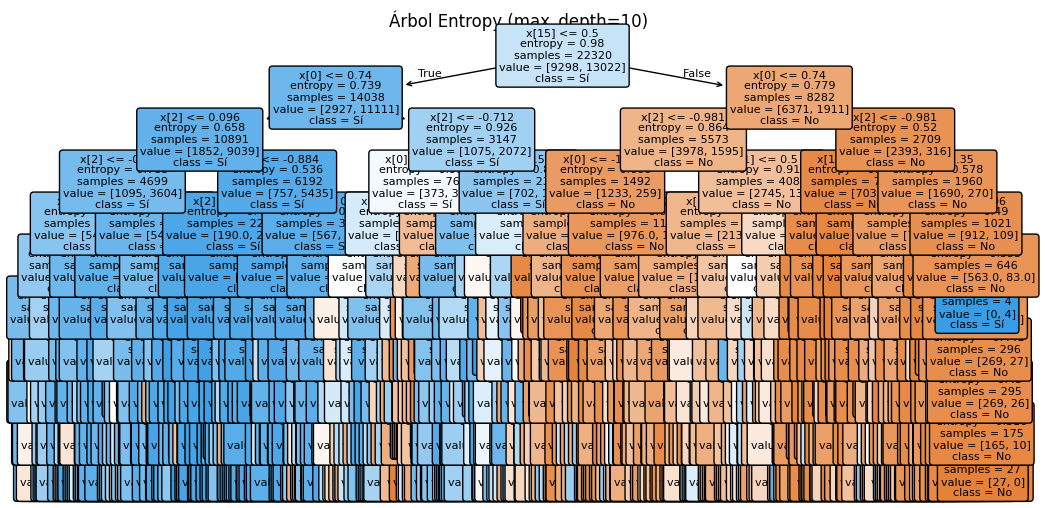

max_depth  accuracy
0          1  0.777818
1          2  0.777818
2          3  0.777818
3          4  0.781401
4          5  0.779609
5          6  0.781580
6          7  0.778534
7          8  0.776026
8          9  0.772084
9         10  0.767604

In [33]:
resultados_entropy = []

for d in range(1, 11):
    modelo = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=d, random_state=123)
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, pred)
    resultados_entropy.append({'max_depth': d, 'accuracy': acc})

    plt.figure(figsize=(12, 6))
    plot_tree(modelo, filled=True, class_names=['No', 'Sí'], rounded=True, fontsize=8)
    plt.title(f"Árbol Entropy (max_depth={d})")
    plt.show()

pd.DataFrame(resultados_entropy)


## Variación del hiperparámetro: `min_samples_split`

In [40]:
for split in [5, 20, 100]:
    modelo = DecisionTreeClassifier(
            criterion='entropy', splitter='best', max_depth=5,
            min_samples_split=split, random_state=123)

    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"min_samples_split = {split} => Accuracy: {acc:.4f}")

min_samples_split = 5 => Accuracy: 0.7796
min_samples_split = 20 => Accuracy: 0.7796
min_samples_split = 100 => Accuracy: 0.7796


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in [3, 5, 10]:
    for split in [2, 10]:
        for leaf in [1, 5, 10]:
            modelo = DecisionTreeClassifier(
                    criterion='entropy',
                    splitter='best',
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=123
                
            )
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"depth={depth} | split={split} | leaf={leaf} => acc={acc:.4f}")

              

depth=3 | split=2 | leaf=1 => acc=0.7778
depth=3 | split=2 | leaf=5 => acc=0.7778
depth=3 | split=2 | leaf=10 => acc=0.7778
depth=3 | split=10 | leaf=1 => acc=0.7778
depth=3 | split=10 | leaf=5 => acc=0.7778
depth=3 | split=10 | leaf=10 => acc=0.7778
depth=5 | split=2 | leaf=1 => acc=0.7796
depth=5 | split=2 | leaf=5 => acc=0.7796
depth=5 | split=2 | leaf=10 => acc=0.7796
depth=5 | split=10 | leaf=1 => acc=0.7796
depth=5 | split=10 | leaf=5 => acc=0.7796
depth=5 | split=10 | leaf=10 => acc=0.7796
depth=10 | split=2 | leaf=1 => acc=0.7676
depth=10 | split=2 | leaf=5 => acc=0.7647
depth=10 | split=2 | leaf=10 => acc=0.7642
depth=10 | split=10 | leaf=1 => acc=0.7681
depth=10 | split=10 | leaf=5 => acc=0.7647
depth=10 | split=10 | leaf=10 => acc=0.7642


Reporte de clasificación:
              precision    recall  f1-score   support

No Depresión       0.73      0.66      0.70      2267
Sí Depresión       0.78      0.83      0.81      3314

    accuracy                           0.76      5581
   macro avg       0.76      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581



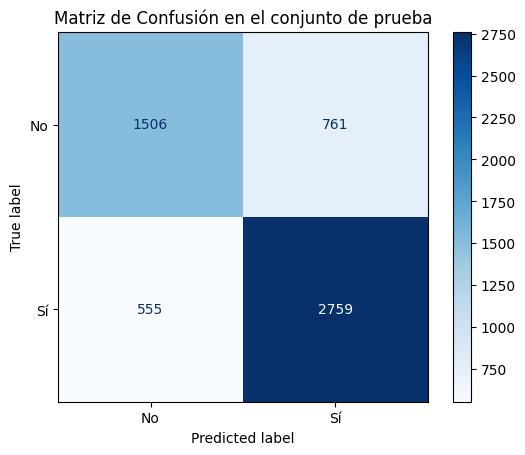

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Ya entrenado tu modelo con X_train e y_train...
y_pred = modelo.predict(X_test)

# Informe de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No Depresión", "Sí Depresión"]))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Sí"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión en el conjunto de prueba")
plt.show()
